Nomor 5 dari soal

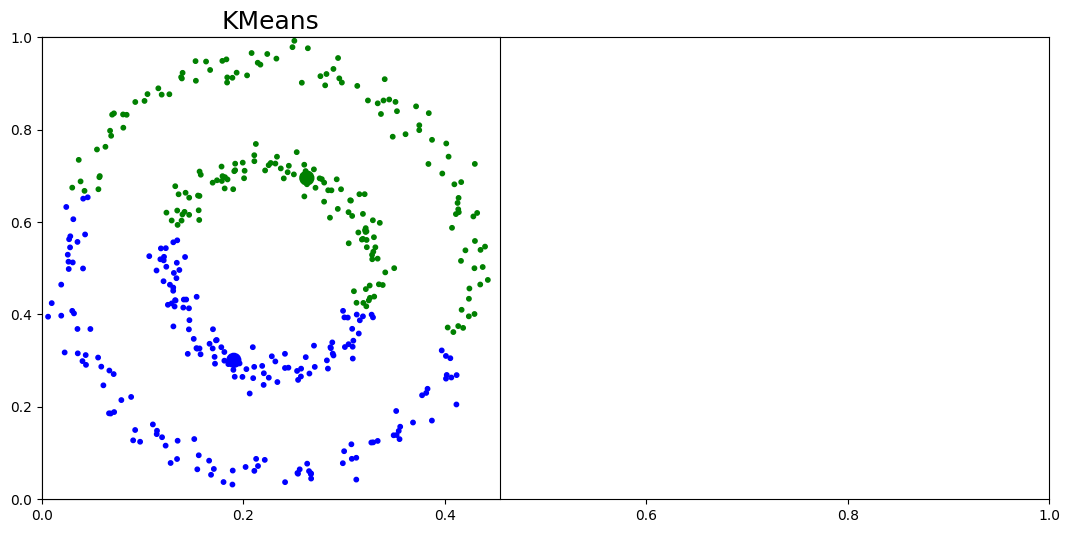

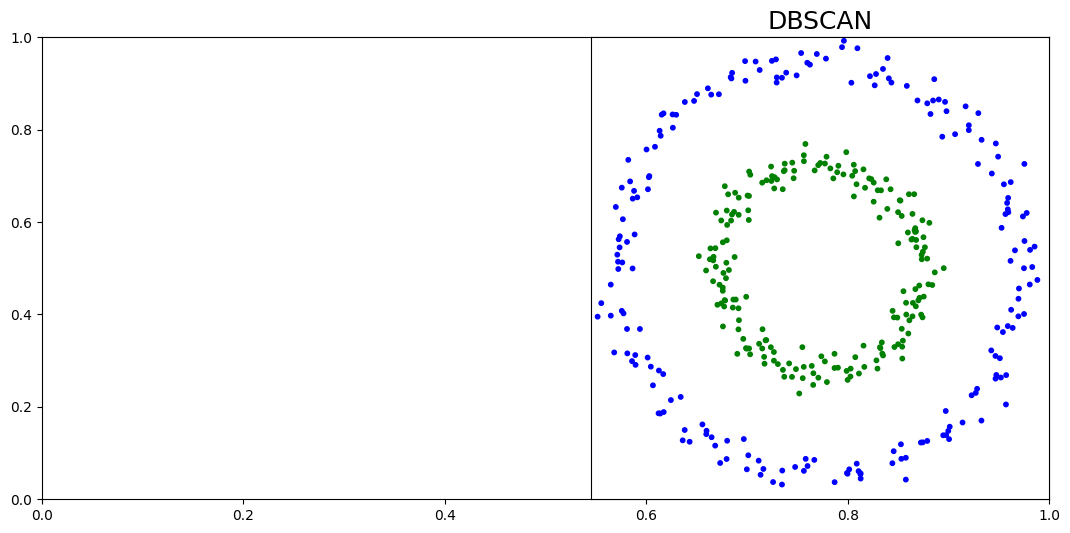

In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

np.random.seed(0)

#you may change the parameters of the samples and the following toy sample functions
n_samples = 400
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
X, y = noisy_circles
#blobs = datasets.make_blobs(n_samples=n_samples, random_state=9)
#X, y = blobs
#noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.08)
#X, y = noisy_moons

X = StandardScaler().fit_transform(X)

#you may change the parameters of the clustering algorithm below
k_means = cluster.KMeans(n_clusters=2)
dbscan = cluster.DBSCAN(eps=.3)

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

clustering_names = ['KMeans', 'DBSCAN']
clustering_algorithms = [k_means, dbscan]

plot_num = 1

for name, algorithm in zip(clustering_names, clustering_algorithms):
        algorithm.fit(X)
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        # plot
        plt.subplots(figsize=(13, 6))
        plt.subplot(1, len(clustering_algorithms), plot_num)
        plt.title(name, size=18)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)

        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())

        plot_num += 1


plt.show()